## Exploratory Data Analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [7]:
# Read data
df = pd.read_csv("winequality.csv")

# Create categorical variable 'wine quality' based on 'quality'
df['wine quality'] = pd.cut(df["quality"], bins=[0, 5, float('Inf')], labels=['Bad', 'Good'])

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

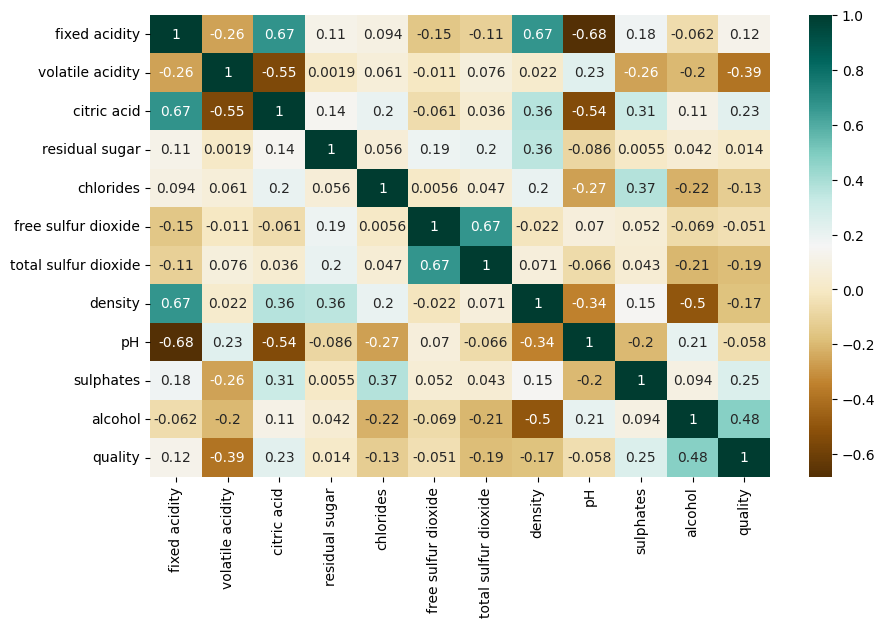

In [8]:
# 1. Compute the correlations for each of the pair of attributes available in the dataset. Interpret the statistical findings 

from scipy import stats

dataFrame = df.loc[:, df.columns != 'wine quality']
print(dataFrame.corr())

plt.figure(figsize=(10, 6))
dataplot = sns.heatmap(dataFrame.corr(), cmap="BrBG", annot=True)
plt.show()

With a correlation coefficient of -0.68 there appears to be a strong negative correlation between ```pH``` and ```fixed acidity```, implying that if ```fixed acidity``` increases, so will ```pH``` by the same magnitude. There is also a strong positive correlation between ```fixed acidity``` and ```citric acid```, ```fixed acidity``` and ```density```, ```free sulfur dioxide``` and ```total sulfur dioxide```.

There is also a moderate negative correlation between ```volatile acidity``` and ```citric acid```, ```citric acid``` and ```pH```, and ```density``` and ```alcohol```. Likewise, there is a moderate positive correlation between ```alcohol``` and ```quality```.

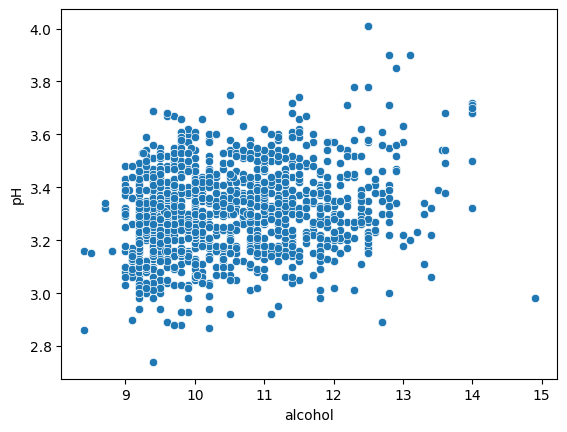

In [9]:
# 2. Create a scatter plot for the attributes alcohol and pH and interpret the plot.

sns.scatterplot(x='alcohol', y='pH', data=df)
plt.show()

There is a very weak, positive, and somewhat linear correlation between ```alcohol``` and ```pH```.

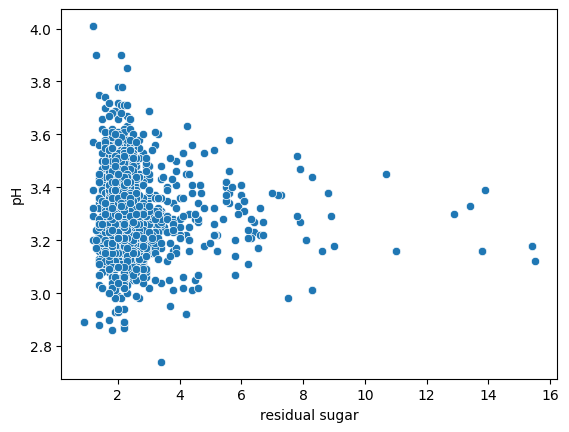

In [10]:
# 3. Create a scatter plot for the attributes residual sugar and pH and interpret the plot.

sns.scatterplot(x='residual sugar', y='pH', data=df)
plt.show()

There is no apparent relationship between ```residual sugar``` and ```pH```. Many values are clumped together, where ```pH``` varies the most when ```residual sugar``` is equal to 2 g/dm^3.

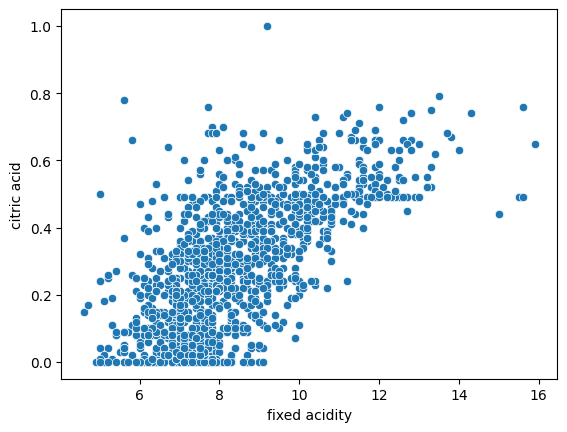

In [11]:
# 4. Create a scatter plot for the attributes fixed acidity and citric acid and interpret the plot.

sns.scatterplot(x='fixed acidity', y='citric acid', data=df)
plt.show()

There is a positive linear association between ```fixed acidity``` and ```citric acid```. As ```fixed acidity``` increases, ```citric acid``` appears to do so as well.

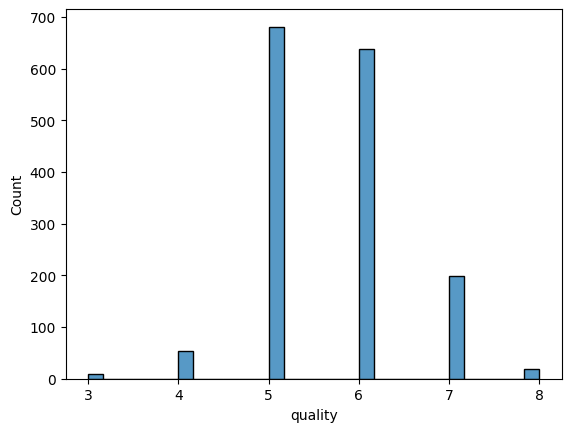

5.6360225140712945
6.0
0    5
Name: quality, dtype: int64


In [12]:
# 5. Create a histogram of the quality attribute and interpret the resulting histogram.
sns.histplot(x='quality', data=df)
plt.show()

print(df["quality"].mean())
print(df["quality"].median())
print(df["quality"].mode())


There appears to be a normal distribuion among ```quality``` scores with a range between 3 and 8, a mean value of 5.6360, a median value of 6, and a mode value of 5.

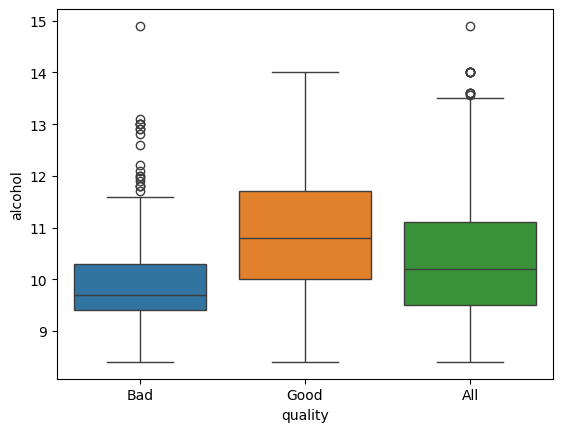

In [13]:
# # 6. Create a box plot for alcohol attribute for the instances of the quality classes (Bad, Good), 
# # and all instances in the dataset (three boxes in the same plot). 
# # Interpret the resulting box plots.

badWine = df.loc[df['wine quality']=='Bad', 'alcohol']
goodWine = df.loc[df['wine quality']=='Good', 'alcohol']
allInstances = df['alcohol']

new_df = pd.DataFrame({'Bad': badWine, 'Good': goodWine, 'All': allInstances})
new_df


sns.boxplot(data=new_df).set(
    xlabel='quality', 
    ylabel='alcohol',
)
plt.show()


For all instances in the dataset, the alcohol by volume ranged between 7.1% and 13.5%, with a lower quartile value of 9.4%, a median value of 9.7%, an upper quartile value of 10.3%, and an IQR of 1.60%. There appear to be upper outliers of values of up to 14.9%, indicating a wide distribution. The data appears to be skewed to the right and less dispersed than instances where ```wine quality``` was ```Good``` but more spread out than those that were ```Bad```.

For instances where ```wine quality``` was ```Bad```, the alcohol by volume ranged between 8.95% and 11.65%, with a lower quartile value of 9.4%, a median value of 9.7%, an upper quartile value of 10.3%, and an IQR of 0.90%. There appear to be upper outliers of values of up to 14.9%, indicating a wide distribution. The data appears to be symmetric, possibly slightly skewed to the right, and less dispersed than instances where ```wine quality``` was ```Good``` and all instances.

For instances where ```wine quality``` was ```Good```, the alcohol by volume ranged between 9.15% and 14.25%, with a lower quartile value of 10.0%, a median value of 10.8%, an upper quartile value of 11.7%, and an IQR of 1.70%. There are no apparent outliers. The data also appears to be mostly symmetric and more dispersed than all instances and instances where ```wine quality``` was ```Bad```.

Overall, the median alcohol by volume is highest in instances where ```wine quality``` was ```Good```, as well as the most symmetric distribution compared to all instances and instances where ```wine quality``` was ```Bad```. Since the boxplot for this is higher than the other, and each one varies in size, this suggests an area of difference.

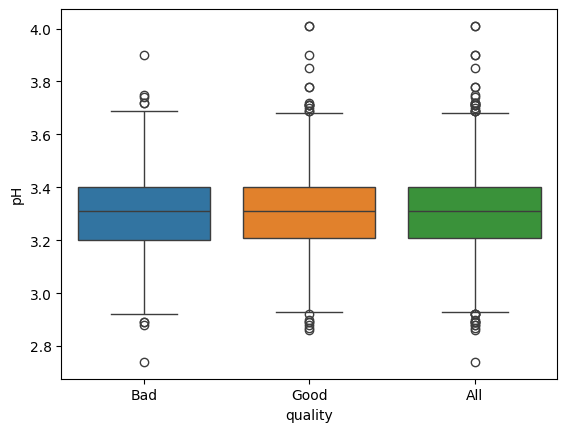

In [14]:
# 7. Create a box plot for pH attribute for the instances of the quality classes (Bad, Good), 
# and all instances in the dataset (three boxes in the same plot). 
# Interpret the resulting box plots.

badWine = df.loc[df['wine quality']=='Bad', 'pH']
goodWine = df.loc[df['wine quality']=='Good', 'pH']
allInstances = df['pH']

new_df = pd.DataFrame({'Bad': badWine, 'Good': goodWine, 'All': allInstances})
new_df

sns.boxplot(data=new_df).set(
    xlabel='quality', 
    ylabel='pH'
)
plt.show()


For all instances in the dataset, pH ranged between 2.925 and 3.685, with a lower quartile value of 3.21, a median value of 3.31, an upper quartile value of 3.4, and an IQR of 0.19. There appear to be lower outliers of values as low as 2.74 and upper outliers of values of up to 4.01, indicating a wide distribution. The data appears to be skewed to be symmetric.

For instances where ```wine quality``` was ```Bad```, pH ranged between 3.1 and 3.7, with a lower quartile value of 3.2, a median value of 3.31, an upper quartile value of 3.4, and an IQR of 0.20. There appear to be lower outliers of values as low as 2.74 and upper outliers of values of up to 3.9, indicating a wide distribution. The data appears to be symmetric.

For instances where ```wine quality``` was ```Good```, pH ranged between 3.115 and 3.685, with a lower quartile value of 3.21, a median value of 3.31, an upper quartile value of 3.4, and an IQR of 0.19. There appear to be lower outliers of values as low as 2.86 and upper outliers of values of up to 4.01, indicating a wide distribution. The data also appears to be symmetric.

Overall, the median pH value among all three boxplot are similar, and all three boxplot show a disperse distribution with both lower and upper outliers. Minimum, maximum, lower quartile, upper quartile, and IQR values are also similar among all three boxplots.

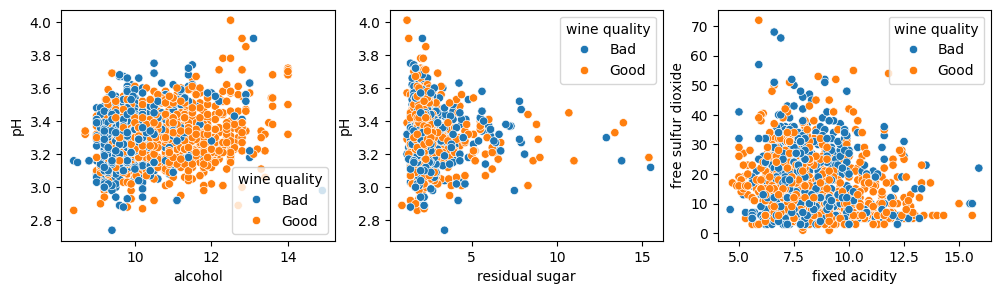

In [15]:
# 8. Create supervised scatter plots for the following 3 pairs of attributes using quality as a class variable: 
# alcohol / pH, residual sugar / pH, and fixed acidity / free sulfur dioxide. 
# Use different colors for the class variable. 
# Interpret the obtained plots and address what can be said about the difficulty in predicting the quality and the distribution of the instances of the three classes. 
# Identify the best pair of attributes based on the generated supervised scatter plots.

fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=False)

sns.scatterplot(ax=axs[0], data = df, x = 'alcohol', y = 'pH', hue = 'wine quality');
sns.scatterplot(ax=axs[1], data = df, x = 'residual sugar', y = 'pH', hue = 'wine quality');
sns.scatterplot(ax=axs[2], data = df, x = 'fixed acidity', y = 'free sulfur dioxide', hue = 'wine quality');

plt.show()




In both instances where ```wine quality``` was either ```Good``` or ```Bad```, there was a weak positive relationship between ```alcohol``` and ```pH```, no association between ```residual sugar``` and ```pH```, as well as no association between ```fixed acidity``` and ```free sulfur dioxide```. The relationship in both ```alcohol/pH``` plots is somewhat linear, but distribution is more spread out when ```wine quality``` is ```Good```, whereas it is more clumped closely together when ```wine quality``` is ```Bad```. The distribution in the other plots, is also more clumped together and shows a non-linear relationship. In all plots though, it is difficult to predict the quality and relationship between the variables. 

The best pair of attributes would be alcohol and pH as there is a higher correlation, albeit still weak, as compared to ```residual sugar``` and ```pH``` and ```fixed acidity``` and ```free sulfur dioxide```.

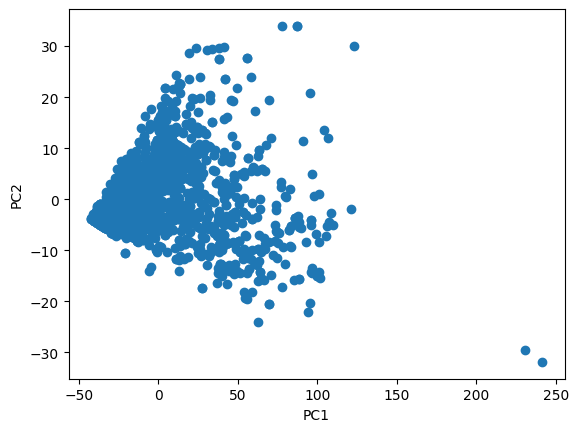

In [16]:
# 9. Perform PCA on all of the attributes, reduce the dimension to 2 principal components (2D PCA), 
# and create a supervised scatter plot on the 2 principal components. 

data = df.loc[:, df.columns != 'wine quality']

pca = PCA(n_components=2)
transformData = pca.fit_transform(data)
transformData

plt.scatter(transformData[:,0], transformData[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

[[0.24778761 0.39726027 0.         ... 0.13772455 0.15384615 0.4       ]
 [0.28318584 0.52054795 0.         ... 0.20958084 0.21538462 0.4       ]
 [0.28318584 0.43835616 0.04       ... 0.19161677 0.21538462 0.4       ]
 ...
 [0.15044248 0.26712329 0.13       ... 0.25149701 0.4        0.6       ]
 [0.11504425 0.35958904 0.12       ... 0.22754491 0.27692308 0.4       ]
 [0.12389381 0.13013699 0.47       ... 0.19760479 0.4        0.6       ]]


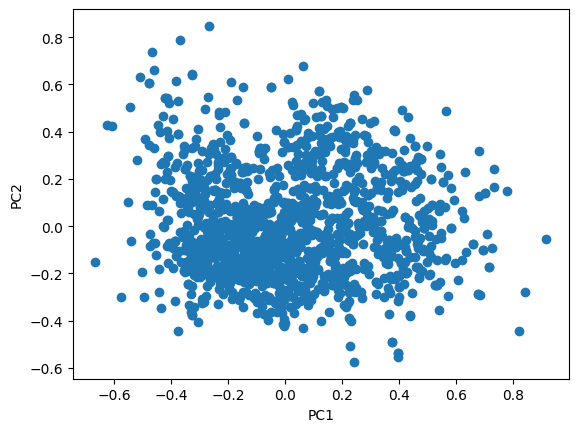

In [17]:
# Then normalize all of the attributes with Z-Score and Min-Max normalization, 

from sklearn.preprocessing import MinMaxScaler, StandardScaler

minMaxScaler = MinMaxScaler()

mmData = minMaxScaler.fit_transform(data)
print(mmData)

pcaMM = PCA(n_components=2)
transformDataMM = pcaMM.fit_transform(mmData)
transformDataMM


plt.scatter(transformDataMM[:,0], transformDataMM[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
  -0.78782264]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
  -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
  -0.78782264]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   0.45084835]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
  -0.78782264]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   0.45084835]]


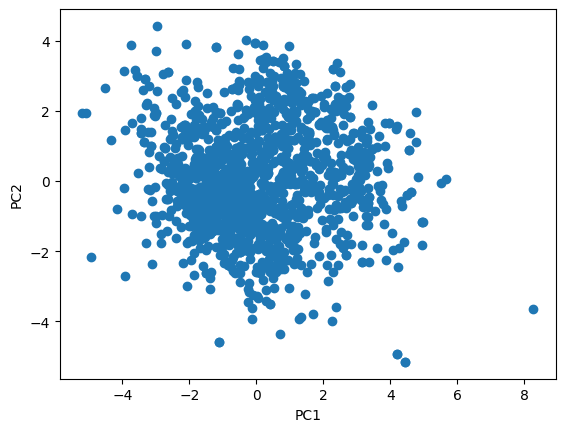

In [18]:
# perform 2D PCA on the normalized attributes, and create two supervised scatter plots, 
# one for the 2 principal components of the Z-Score normalized attributes, 
# another for the 2 principal components of the Min-Max normalized attributes. 

scaler = StandardScaler()

scaledData = scaler.fit_transform(data)

print(scaledData)

pcaZScore = PCA(n_components=2)
transformDataZScore = pcaZScore.fit_transform(scaledData)
transformDataZScore

plt.scatter(transformDataZScore[:,0], transformDataZScore[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [19]:
# Tell the difference before and after normalization, infer the reason of any difference, 
# tell which normalization method is better and why, interpret how PCA is useful and what are its benefits in this data analysis.


Before normaliztion, the data appeared to be heavily clumped together with a few high outliers. This means that not every is equally as important and is not of the same scale. After normaliztion, the data appeared to be more evenly spread out, indicating that they are now roughly on the same scale. There also appear to be few higher outliers, and if there are then they are not as extreme. The reason for this difference could be due to how normaliztion transforms the data as well as the residuals to better solve for coefficients, thus changing its distribution.

In terms of normalization methods, Z-Score normalization would be better since it is resilient to outliers, meaning it handles outliers, while Min-Max normalization doesn't and is thus strongly affected by them. While Z-Score normalization does handle outliers, it does not produce normalized data with the exact same scale as Min-Max does. Min-Max, while scaling the data to a fixed range, of usually [0,1] or [-1, 1], can lead to smaller standard deviations which can then suppress the weight of outliers.

PCA is useful since it takes a large set of data and transforms it into a lower dimensionsals, called Principal Components, by extracting the most important features while preserving the most relevant data that explain the most variation. By doing so, it reduces redundant information and model complexity, while also eliminating issues sucha s multicolinearity and overfitting. It is also used to help visualize data better, like in this data analysis, to better help understand relationships within the data.

In [20]:
# 10. Write a brief conclusion summarizing the most important findings of this task; 
# in particular, address the findings obtained related to predicting the quality of red wine. 
# If possible, write about which attributes seem useful for predicting wine quality and what you as an individual can learn from this dataset.

From this dataset, it can be inferred that the most useful attributes in predicting wine quality are ```alcohol```, ```volatile acidity```, ```density```, ```total sulfur dioxide```, and ```sulphates```. It was found that there is a weak positive correlation between ```pH``` and ```alcohol``` and a strong positive correlation between ```fixed acidity``` and ```citric acid```. Most red wines were given a ```quality``` score of a 5, thus being categorized as ````Bad```. In addition, half of the observations were found to have an ```alcohol``` value less than or equal to 9.7%, with the other half greater than or equal to this. For those with a ```wine quality``` of ```Bad``` and ```Good```, this was 9.4% and 10% respectively. Additionally, from this dataset we are able to learn more about the physiochemical properties of wine and how it affects our sensory attributes and thus how we'd rate their quality. This dataset also enables us to learn more about pre-processing and data visualization.